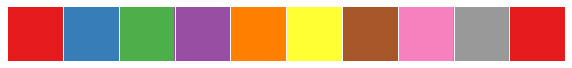

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('precision', 4)
np.set_printoptions(precision=3)

import warnings
warnings.filterwarnings('ignore')

sns.set_palette('Set1', 10)
sns.set_context('notebook', font_scale=1.2)
sns.palplot(sns.color_palette())

## 목차
1. Read the dataset (after extracting)
2. Preprocessing
3. EDA
4. Modeling
5. Evaluation

### 1. Read the dataset
 - 간혹 csv를 불러올 때 unnamed 라는 컬럼이 자동으로 생성되므로, index_col=0 이라는 명령어를 통해 처리

In [2]:
df = pd.read_csv("testset.csv", index_col=0)

In [3]:
df.head()

,iduser,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
0,10100018739106,NaN,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
1,10100037810674,NaN,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,...,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
2,10100036273719,NaN,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
3,10100027752244,NaN,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,...,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
4,10100000624840,NaN,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,iduser,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
199995,10100014533282,NaN,sdu,37.0,0.0,2.0,0.0,0.0,25.0,0.0,...,0.0,0.0,14.0,37.0,7.0,0.0,1.3064e+07,1922364.0,0.0,1.4987e+07
199996,10100037382422,a2p,mdu,6.0,0.0,0.0,6.0,0.0,NaN,NaN,...,NaN,NaN,18.0,6.0,0.0,0.0,1.5937e+07,0.0,0.0,1.5937e+07
199997,10100024157271,NaN,sdu,32.0,0.0,0.0,0.0,0.0,28.0,0.0,...,0.0,0.0,18.0,32.0,0.0,0.0,7.3059e+06,0.0,0.0,7.3059e+06
199998,10100022150627,NaN,sdu,18.0,0.0,0.0,0.0,0.0,20.0,0.0,...,0.0,0.0,9.0,18.0,0.0,0.0,5.3352e+07,0.0,0.0,5.3352e+07
199999,10100021804275,NaN,sdu,3.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,3.0,3.0,0.0,0.0,9.5232e+04,0.0,0.0,9.5232e+04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 22 columns):
iduser           200000 non-null int64
mdutype          9328 non-null object
group            200000 non-null object
viewCount        165369 non-null float64
editCount        165369 non-null float64
shareCount       165369 non-null float64
searchCount      165369 non-null float64
coworkCount      165369 non-null float64
add              63166 non-null float64
del              63166 non-null float64
move             63166 non-null float64
rename           63166 non-null float64
adddir           63166 non-null float64
movedir          63166 non-null float64
visdays          184306 non-null float64
openCount        149090 non-null float64
saveCount        149090 non-null float64
exportCount      149090 non-null float64
viewTraffic      149090 non-null float64
editTraffic      149090 non-null float64
exportTraffic    149090 non-null float64
traffic          149090 non-null float64

### Pandas DF index 지정
- 유저ID와 같은 유니크 값(primary key)를 인덱스로 지정하는 것이 편리함 (pandas 장점)
- 그렇지 않으면, 추후 scaling 이나 모델 학습 등을 할때 매번 슬라이싱으로 처리해야함 

In [6]:
df.set_index("iduser", inplace=True)

In [7]:
df.head()

,mdutype,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,...,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,,
10100018739106,NaN,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,NaN,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,...,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,NaN,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,NaN,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100000624840,NaN,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.drop("mdutype", axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 10100018739106 to 10100021804275
Data columns (total 20 columns):
group            200000 non-null object
viewCount        165369 non-null float64
editCount        165369 non-null float64
shareCount       165369 non-null float64
searchCount      165369 non-null float64
coworkCount      165369 non-null float64
add              63166 non-null float64
del              63166 non-null float64
move             63166 non-null float64
rename           63166 non-null float64
adddir           63166 non-null float64
movedir          63166 non-null float64
visdays          184306 non-null float64
openCount        149090 non-null float64
saveCount        149090 non-null float64
exportCount      149090 non-null float64
viewTraffic      149090 non-null float64
editTraffic      149090 non-null float64
exportTraffic    149090 non-null float64
traffic          149090 non-null float64
dtypes: float64(19), object(1)
memory usage: 32.0+ MB


In [10]:
# check how many nulls are there in each cols
df.isnull().sum() # sum function applys to only True values

group                 0
viewCount         34631
editCount         34631
shareCount        34631
searchCount       34631
coworkCount       34631
add              136834
del              136834
move             136834
rename           136834
adddir           136834
movedir          136834
visdays           15694
openCount         50910
saveCount         50910
exportCount       50910
viewTraffic       50910
editTraffic       50910
exportTraffic     50910
traffic           50910
dtype: int64

### 결측치 처리
- 가장 쉬운 방법은 Null이 포함 행을 모두 제거하는 것이다. 사례(observation)이 많다면 이 방법을 사용하는 것이 가능하다.

```python
# 결측치가 하나도 없는 Case만 선택하는 코드 예제
df[df.isnull().any(axis=1)]
```

- 만약 샘플수가 충분하지 않을 경우, Pandas의 fillna() 명령어로 Null 값을 채우는 것이 가능하다. 연속형인 경우 Mean이나 Median을 이용하고 명목형인 경우 Mode(최빈치)나 예측 모형을 통해 Null 값을 대체할 수 있다.

```python
# Null 값을 median, mean으로 대체하는 코드 예제
df.fillna(df.med())
df.fillna(df.mean()) 

# Scikit-learn Imputation을 이용하여 명목변수의 Null 값을 Mode로 대체한 예제
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values = 'NaN', strategy='most_frequent', axis=0)
df['X'] = imp.fit_transform(df['X'])
```

In [11]:
# visdays 컬럼이 null 경우만 선택
df[df['visdays'].isnull() == True].head(10)

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100022918449,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100009612042,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100017397956,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100030949780,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100021285047,sdu,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,5680128.0,0.0,0.0,5680128.0
10100025107423,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100038550949,sdu,2.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,0.0,2120744.0,0.0,0.0,2120744.0
10100013191329,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100038688226,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# exclude if null in the visdays col
df1 = df.dropna(subset=['visdays'])

In [13]:
df1.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100000624840,sdu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184306 entries, 10100018739106 to 10100021804275
Data columns (total 20 columns):
group            184306 non-null object
viewCount        161772 non-null float64
editCount        161772 non-null float64
shareCount       161772 non-null float64
searchCount      161772 non-null float64
coworkCount      161772 non-null float64
add              63081 non-null float64
del              63081 non-null float64
move             63081 non-null float64
rename           63081 non-null float64
adddir           63081 non-null float64
movedir          63081 non-null float64
visdays          184306 non-null float64
openCount        145903 non-null float64
saveCount        145903 non-null float64
exportCount      145903 non-null float64
viewTraffic      145903 non-null float64
editTraffic      145903 non-null float64
exportTraffic    145903 non-null float64
traffic          145903 non-null float64
dtypes: float64(19), object(1)
memory usage: 29.5+ MB


In [15]:
# visday 와 group 을 제외한 나머지 항목이 모두 nan 이면 drop
mycols = df1.columns[1:].drop('visdays')

mycols

Index([u'viewCount', u'editCount', u'shareCount', u'searchCount',
       u'coworkCount', u'add', u'del', u'move', u'rename', u'adddir',
       u'movedir', u'openCount', u'saveCount', u'exportCount', u'viewTraffic',
       u'editTraffic', u'exportTraffic', u'traffic'],
      dtype='object')

In [16]:
df2 = df1.dropna(subset=mycols, how='all')

df2.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163352 entries, 10100018739106 to 10100021804275
Data columns (total 20 columns):
group            163352 non-null object
viewCount        161772 non-null float64
editCount        161772 non-null float64
shareCount       161772 non-null float64
searchCount      161772 non-null float64
coworkCount      161772 non-null float64
add              63081 non-null float64
del              63081 non-null float64
move             63081 non-null float64
rename           63081 non-null float64
adddir           63081 non-null float64
movedir          63081 non-null float64
visdays          163352 non-null float64
openCount        145903 non-null float64
saveCount        145903 non-null float64
exportCount      145903 non-null float64
viewTraffic      145903 non-null float64
editTraffic      145903 non-null float64
exportTraffic    145903 non-null float64
traffic          145903 non-null float64
dtypes: float64(19), object(1)
memory usage: 26.2+ MB


In [18]:
# 변수 특성에 맞게, mean, zero 등으로 imputaion
df2.loc[:,'viewCount':'coworkCount'] = df2.loc[:,'viewCount':'coworkCount'].fillna(df2.mean())
df2.loc[:,'openCount':'traffic'] = df2.loc[:,'openCount':'traffic'].fillna(df2.mean())

df2.loc[:,'add':'movedir'] = df2.loc[:,'add':'movedir'].fillna(0)

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163352 entries, 10100018739106 to 10100021804275
Data columns (total 20 columns):
group            163352 non-null object
viewCount        163352 non-null float64
editCount        163352 non-null float64
shareCount       163352 non-null float64
searchCount      163352 non-null float64
coworkCount      163352 non-null float64
add              163352 non-null float64
del              163352 non-null float64
move             163352 non-null float64
rename           163352 non-null float64
adddir           163352 non-null float64
movedir          163352 non-null float64
visdays          163352 non-null float64
openCount        163352 non-null float64
saveCount        163352 non-null float64
exportCount      163352 non-null float64
viewTraffic      163352 non-null float64
editTraffic      163352 non-null float64
exportTraffic    163352 non-null float64
traffic          163352 non-null float64
dtypes: float64(19), object(1)
memory usage: 26.2

In [20]:
df2.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [21]:
df2.tail()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100014533282,sdu,37.0,0.0,2.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,14.0,37.0,7.0,0.0,1.3064e+07,1922364.0,0.0,1.4987e+07
10100037382422,mdu,6.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,6.0,0.0,0.0,1.5937e+07,0.0,0.0,1.5937e+07
10100024157271,sdu,32.0,0.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,18.0,32.0,0.0,0.0,7.3059e+06,0.0,0.0,7.3059e+06
10100022150627,sdu,18.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,9.0,18.0,0.0,0.0,5.3352e+07,0.0,0.0,5.3352e+07
10100021804275,sdu,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,0.0,0.0,9.5232e+04,0.0,0.0,9.5232e+04


In [22]:
# mean of each columns

df2.mean().astype(str)

viewCount            25.03619291348364
editCount           1.6059268600252612
shareCount         0.07670672304230848
searchCount         1.0309262418712668
coworkCount      0.0031773112776006663
add                 12.167766540966747
del               0.003140457417111514
move               0.04703952201381067
rename              0.4136098731573534
adddir             0.15253562858122338
movedir          0.0023813604975757873
visdays             10.020042607375483
openCount           24.860647142282506
saveCount           2.7537199372194445
exportCount       0.008841490579360478
viewTraffic          25957586.87730649
editTraffic          732230.5337519301
exportTraffic        4008.581523340636
traffic             26693825.992584582
dtype: object

#### Missing Value 처리에 대해 자세히 살펴보기
 - Missing Value 파악을 위해 df.info() 가장 처음에 이용
     - 만약 np.nan으로 적절히 missing value로 불러왔다면 info() 이용 가능
     - 만약 '', ' ' 이런식의 공백이나 다른 방식으로 처리되어 있다면, 모두 repalce 처리
     - info()를 실행했을 때, 누가봐도 float or int 인데 object(string)으로 되어 있다면 이런 사레가 포함될 가능성 높음

In [23]:
# test dataframe 생성
test = df2[['group', 'viewCount']]

test.head()

,group,viewCount
iduser,,
10100018739106,sdu,12.0
10100037810674,sdu,23.0
10100036273719,sdu,4.0
10100027752244,sdu,6.0
10100006151000,sdu,33.0


In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163352 entries, 10100018739106 to 10100021804275
Data columns (total 2 columns):
group        163352 non-null object
viewCount    163352 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.7+ MB


In [25]:
test.loc[10100037810674,'viewCount']

23.0

In [26]:
test.loc[10100037810674,'viewCount'] = ''
test.loc[10100036273719,'viewCount'] = ''

In [27]:
test.head()

,group,viewCount
iduser,,
10100018739106,sdu,12
10100037810674,sdu,
10100036273719,sdu,
10100027752244,sdu,6
10100006151000,sdu,33


In [28]:
test.info() # viewcount type = object

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163352 entries, 10100018739106 to 10100021804275
Data columns (total 2 columns):
group        163352 non-null object
viewCount    163352 non-null object
dtypes: object(2)
memory usage: 8.7+ MB


In [29]:
test.sort_values("viewCount", ascending=False).head(10) # default: ascending=True 

,group,viewCount
iduser,,
10100037810674,sdu,
10100036273719,sdu,
10100004393355,sdu,3005
10100028865215,sdu,2373
10100001015133,sdu,1643
10100018982273,sdu,1578
10100036794381,sdu,1325
10100038699275,sdu,1178
10100038295824,mdu,1117


In [30]:
# if no float, replace with np.nan
for i in test.index:
    
    if type(test.loc[i, 'viewCount']) == float:
        test.loc[i, 'viewCount'] == test.loc[i, 'viewCount']
    
    else:
        test.loc[i, 'viewCount'] = np.nan

In [31]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163352 entries, 10100018739106 to 10100021804275
Data columns (total 2 columns):
group        163352 non-null object
viewCount    163350 non-null object
dtypes: object(2)
memory usage: 8.7+ MB


In [32]:
test.head()

,group,viewCount
iduser,,
10100018739106,sdu,12
10100037810674,sdu,NaN
10100036273719,sdu,NaN
10100027752244,sdu,6
10100006151000,sdu,33


In [33]:
test['viewCount'] = test['viewCount'].fillna(test.viewCount.mean())

In [34]:
test.head()

,group,viewCount
iduser,,
10100018739106,sdu,12.0000
10100037810674,sdu,25.0363
10100036273719,sdu,25.0363
10100027752244,sdu,6.0000
10100006151000,sdu,33.0000


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163352 entries, 10100018739106 to 10100021804275
Data columns (total 2 columns):
group        163352 non-null object
viewCount    163352 non-null float64
dtypes: float64(1), object(1)
memory usage: 8.7+ MB


In [36]:
# replace 이용 방식 (단 에러 값을 정확히 알고 있어야 함)
test.loc[10100037810674,'viewCount'] = ''
test.loc[10100036273719,'viewCount'] = ''

In [37]:
test.head()

,group,viewCount
iduser,,
10100018739106,sdu,12
10100037810674,sdu,
10100036273719,sdu,
10100027752244,sdu,6
10100006151000,sdu,33


In [38]:
# if sure about the error values
test.viewCount = test.viewCount.replace('', np.nan)

In [39]:
test.head()

,group,viewCount
iduser,,
10100018739106,sdu,12.0
10100037810674,sdu,NaN
10100036273719,sdu,NaN
10100027752244,sdu,6.0
10100006151000,sdu,33.0


In [40]:
test.viewCount = test.viewCount.fillna(test.viewCount.mean())

In [41]:
test.head()

,group,viewCount
iduser,,
10100018739106,sdu,12.0000
10100037810674,sdu,25.0363
10100036273719,sdu,25.0363
10100027752244,sdu,6.0000
10100006151000,sdu,33.0000


#### 결측치를 처리할 때 고려할 점
- 결측치를 처리할 경우에도 도메인 지식은 유용하게 사용된다.
    - 인적, 기계적 원인임이 판명되면, 협업자와 지속적으로 노력해 결측치를 사전에 발생하지 않도록 조치하는 것이 좋다
- 수치형인 경우 의미상으로 0으로 메꾸는 것이 맞는지 아니면 평균이나 중앙치가 맞는지 등은 데이터에 대한 배경지식이 있는 경우, 보다 적절한 의사결정을 할 수 있다.
    - 예를 들어 viewCount가 1이상인데, edit, export가 missing인 경우 (도메인 지식을 통해) 0으로 메꾸는 것이 가능하다.
    - View 가 다른 행동에 선행하는 개념이기 때문에 위와 같은 의사결정이 가능하다
- NA 와 Null 차이점 (R에서만 구분되는 개념, 파이썬에서는 numpy의 NaN만 이용, 가끔 pure python에서 None을 볼 수 있음, None = empty)
    - NA: Not Available (does not exist, missing)
    - Null: empty(null) object
    - NaN: Not a Number (python)
    - reference: https://www.r-bloggers.com/r-na-vs-null/
- 특히 숫자 0과 null 과 같은 결측치는 완전히 다른 개념이니 유의해야 한다.
    - 0: -1과 1 사이의 가운데 숫자(정수)
    - null: 미지의 값
- 만약 target(group)에 결측치가 있다면 imputation이 아닌 drop 으로 처리하도록 한다.

In [42]:
test.head()

,group,viewCount
iduser,,
10100018739106,sdu,12.0000
10100037810674,sdu,25.0363
10100036273719,sdu,25.0363
10100027752244,sdu,6.0000
10100006151000,sdu,33.0000


In [43]:
test.iloc[1,0]

'sdu'

In [44]:
test.iloc[1,0] = np.nan
test.iloc[2,0] = np.nan
test.iloc[2,1] = np.nan

In [45]:
test.head()

,group,viewCount
iduser,,
10100018739106,sdu,12.0000
10100037810674,NaN,25.0363
10100036273719,NaN,NaN
10100027752244,sdu,6.0000
10100006151000,sdu,33.0000


In [46]:
test.dropna().head()

,group,viewCount
iduser,,
10100018739106,sdu,12.0
10100027752244,sdu,6.0
10100006151000,sdu,33.0
10100036301327,sdu,25.0
10100039037854,sdu,4.0


In [47]:
test.dropna(how='all').head() # there are missing in the group col

,group,viewCount
iduser,,
10100018739106,sdu,12.0000
10100037810674,NaN,25.0363
10100027752244,sdu,6.0000
10100006151000,sdu,33.0000
10100036301327,sdu,25.0000


In [48]:
test.dropna(how='any').head()

,group,viewCount
iduser,,
10100018739106,sdu,12.0
10100027752244,sdu,6.0
10100006151000,sdu,33.0
10100036301327,sdu,25.0
10100039037854,sdu,4.0


#### isnull() function
- 사례 중에 nan 인 경우만 선택하거나 혹은 아닌 경우만 선택할 때 isnull() 함수 활용
- isnull은 null인지 아닌지에 대한 bollean 값(True or False)을 내보냄

In [49]:
test.isnull().head()

,group,viewCount
iduser,,
10100018739106,False,False
10100037810674,True,False
10100036273719,True,True
10100027752244,False,False
10100006151000,False,False


In [50]:
# 필터링 구문 활용
test[test['group'].isnull() == True]

,group,viewCount
iduser,,
10100037810674,NaN,25.0363
10100036273719,NaN,NaN


In [51]:
test[test['group'].isnull() == False].head() # equivalent with dropna()

,group,viewCount
iduser,,
10100018739106,sdu,12.0
10100027752244,sdu,6.0
10100006151000,sdu,33.0
10100036301327,sdu,25.0
10100039037854,sdu,4.0


### 이상치 처리 방법
#### 1. 표준점수 이용
    - 평균이 0, 표준편차가 1인 분포로 변환한후 +3 이상이거나 -3 이하인 경우 극단치로 처리
```python
# 표준점수 기반 예제 코드
def std_based_outlier(df):
    for i in range(0, len(df.iloc[1])): 
        df.iloc[:,i] = df.iloc[:,i].replace(0, np.NaN) # optional
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))].fillna(0)
    return(df)
```

#### 2. IQR 방식
    - 75 percentile + IQR * 1.5 이상이거나 25 percentile + IQR * 1.5 이하인 경우 극단치로 처리
```python
# IQR 기반 예제 코드
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))
```

In [52]:
# 이상치 처리 대상 데이터 (NA 제거한 dataframe)
df2.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [53]:
# 만약 숫자형 변수만 선택하고 싶다면?
# df3 = df2._get_numeric_data() 

df3 = df2.drop("group", axis=1) 

In [54]:
df3.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,163352.0000,1.6335e+05,1.6335e+05,1.6335e+05,1.6335e+05
mean,25.0362,1.6059,0.0767,1.0309,0.0032,12.1678,0.0031,0.0470,0.4136,0.1525,0.0024,10.0200,24.8606,2.7537,0.0088,2.5958e+07,7.3223e+05,4.0086e+03,2.6694e+07
std,36.8544,19.7052,0.5360,8.9737,0.2834,109.6293,0.1661,0.9756,39.4028,2.2262,0.1472,6.6873,34.8882,16.5816,0.3151,1.3317e+08,7.3382e+06,4.0238e+05,1.3438e+08
min,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000e+00,0.0000e+00
25%,7.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.0000,7.0000,0.0000,0.0000,1.5809e+06,0.0000e+00,0.0000e+00,1.6847e+06
50%,15.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,8.0000,17.0000,0.0000,0.0000,7.8972e+06,0.0000e+00,0.0000e+00,8.2227e+06
75%,30.0000,0.0000,0.0000,0.0000,0.0000,15.0000,0.0000,0.0000,0.0000,0.0000,0.0000,14.0000,27.0000,2.0000,0.0000,2.5958e+07,1.1107e+05,0.0000e+00,2.6694e+07
max,3005.0000,5267.0000,78.0000,893.0000,63.0000,17755.0000,28.0000,127.0000,8248.0000,355.0000,32.0000,31.0000,3005.0000,1432.0000,54.0000,2.8260e+10,1.2339e+09,1.1999e+08,2.8260e+10


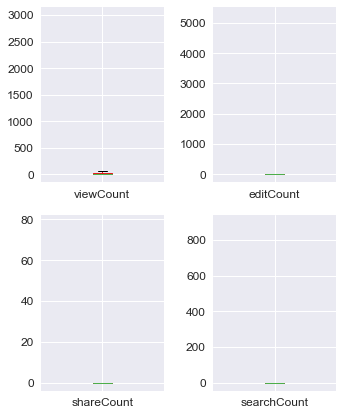

In [55]:
fig, ax = plt.subplots(2, 2)

df3['viewCount'].plot(kind='box', ax=ax[0, 0], figsize=(5, 6));
df3['editCount'].plot(kind='box', ax=ax[0, 1], figsize=(5, 6));
df3['shareCount'].plot(kind='box', ax=ax[1, 0], figsize=(5, 6));
df3['searchCount'].plot(kind='box', ax=ax[1, 1], figsize=(5, 6));

plt.tight_layout()

In [56]:
# 표준점수 이용
def std_based_outlier(df):
    for i in range(0, len(df.iloc[1])): 
        df = df[~(np.abs(df.iloc[:,i] - df.iloc[:,i].mean()) > (3*df.iloc[:,i].std()))]
    return(df)

In [57]:
df4 = std_based_outlier(df3)

In [58]:
df4.head()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [59]:
df4.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,142344.0000,142344.0000,142344.0000,142344.0000,1.4234e+05,142344.0000,142344.0,142344.0000,142344.0000,142344.0000,142344.0,142344.0000,142344.0000,142344.0000,142344.0000,1.4234e+05,1.4234e+05,142344.0000,1.4234e+05
mean,17.9480,0.2909,0.0313,0.1948,2.9330e-05,7.1764,0.0,0.0028,0.0104,0.0617,0.0,8.7920,18.2650,0.9104,0.0010,1.3855e+07,2.3822e+05,470.5459,1.4094e+07
std,16.6593,1.5301,0.1723,1.1348,3.0386e-04,14.3433,0.0,0.0524,0.3183,0.2874,0.0,5.5467,15.1046,1.8963,0.0028,1.7322e+07,8.5638e+05,1290.2790,1.7493e+07
min,2.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000,0.0,0.0000,0.0000,0.0000,0.0,2.0000,2.0000,0.0000,0.0000,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000,0.0,0.0000,0.0000,0.0000,0.0,4.0000,6.0000,0.0000,0.0000,1.3588e+06,0.0000e+00,0.0000,1.4200e+06
50%,12.0000,0.0000,0.0000,0.0000,0.0000e+00,0.0000,0.0,0.0000,0.0000,0.0000,0.0,7.0000,14.0000,0.0000,0.0000,6.5697e+06,0.0000e+00,0.0000,6.7268e+06
75%,25.0000,0.0000,0.0000,0.0000,0.0000e+00,12.0000,0.0,0.0000,0.0000,0.0000,0.0,12.0000,24.8606,1.0000,0.0000,2.5905e+07,4.0673e+04,0.0000,2.6259e+07
max,135.0000,35.0000,1.0000,16.0000,3.1773e-03,332.0000,0.0,1.0000,51.0000,4.0000,0.0,28.0000,82.0000,15.0000,0.0088,1.0128e+08,1.0722e+07,4008.5815,1.0128e+08


In [60]:
df4.drop(['del', 'movedir', 'coworkCount', 'exportCount'], axis=1, inplace=True)

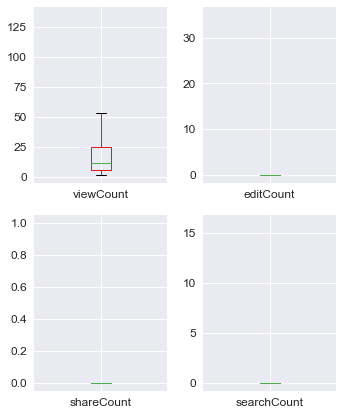

In [61]:
fig, ax = plt.subplots(2, 2)

df4['viewCount'].plot(kind='box', ax=ax[0, 0], figsize=(5, 6));
df4['editCount'].plot(kind='box', ax=ax[0, 1], figsize=(5, 6));
df4['shareCount'].plot(kind='box', ax=ax[1, 0], figsize=(5, 6));
df4['searchCount'].plot(kind='box', ax=ax[1, 1], figsize=(5, 6));

plt.tight_layout()

In [62]:
df5 = df3.copy()

In [63]:
# IQR 기반 예제 코드
def get_subset_by_IQR(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = (df[column] > q1) & (df[column] < q3)
    return df[column].loc[iqr]

In [64]:
for c in df5.columns:
    df5[c] = get_subset_by_IQR(df5, c)

In [65]:
df5.head()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,
10100018739106,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,12.0,NaN,NaN,3.5048e+06,NaN,NaN,3.5048e+06
10100037810674,23.0,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,8.0,23.0,NaN,NaN,1.7123e+07,NaN,NaN,1.7123e+07
10100036273719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.2344e+06,NaN,NaN,2.2344e+06
10100027752244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10100006151000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.3077e+06,NaN,NaN,4.3077e+06


In [66]:
df5.describe()

,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
count,74883.0000,0.0,0.0,0.0,0.0,22189.0000,0.0,0.0,0.0,0.0,0.0,72197.0000,78610.0000,13230.0,0.0,7.4847e+04,18334.0000,0.0,7.4677e+04
mean,16.2949,NaN,NaN,NaN,NaN,11.7282,NaN,NaN,NaN,NaN,NaN,8.9501,17.2893,1.0,NaN,9.0161e+06,37441.4303,NaN,9.3279e+06
std,6.2009,NaN,NaN,NaN,NaN,1.4745,NaN,NaN,NaN,NaN,NaN,2.2362,6.1902,0.0,NaN,6.5054e+06,28486.2558,NaN,6.6817e+06
min,8.0000,NaN,NaN,NaN,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,6.0000,8.0000,1.0,NaN,1.5810e+06,1.0000,NaN,1.6848e+06
25%,11.0000,NaN,NaN,NaN,NaN,10.0000,NaN,NaN,NaN,NaN,NaN,7.0000,11.0000,1.0,NaN,3.5780e+06,14336.0000,NaN,3.7496e+06
50%,15.0000,NaN,NaN,NaN,NaN,12.0000,NaN,NaN,NaN,NaN,NaN,9.0000,17.0000,1.0,NaN,7.0235e+06,28984.5000,NaN,7.2920e+06
75%,21.0000,NaN,NaN,NaN,NaN,13.0000,NaN,NaN,NaN,NaN,NaN,11.0000,24.8606,1.0,NaN,1.3115e+07,55015.2500,NaN,1.3554e+07
max,29.0000,NaN,NaN,NaN,NaN,14.0000,NaN,NaN,NaN,NaN,NaN,13.0000,26.0000,1.0,NaN,2.5957e+07,111063.0000,NaN,2.6694e+07


### 분포 변환
- Transformation
    - Scaling / Normalization
    - Log, Exp, Sqrt functions
- data 특성 상 0(zero) 수치가 매우 많아, 극단적인 positive skewed 분포를 보이는 경우가 많다면 log, sqrt, box-cox 등의 방식으로 변환이 가능하다.

- Reference: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- Reference: http://scikit-learn.org/stable/modules/preprocessing.html

In [67]:
df4.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [68]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 142344 entries, 10100018739106 to 10100021804275
Data columns (total 15 columns):
viewCount        142344 non-null float64
editCount        142344 non-null float64
shareCount       142344 non-null float64
searchCount      142344 non-null float64
add              142344 non-null float64
move             142344 non-null float64
rename           142344 non-null float64
adddir           142344 non-null float64
visdays          142344 non-null float64
openCount        142344 non-null float64
saveCount        142344 non-null float64
viewTraffic      142344 non-null float64
editTraffic      142344 non-null float64
exportTraffic    142344 non-null float64
traffic          142344 non-null float64
dtypes: float64(15)
memory usage: 17.4 MB


In [69]:
df2.head()

,group,viewCount,editCount,shareCount,searchCount,coworkCount,add,del,move,rename,adddir,movedir,visdays,openCount,saveCount,exportCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,,,,,,
10100018739106,sdu,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,sdu,23.0,0.0,0.0,1.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,8.0,23.0,0.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,sdu,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,sdu,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,0.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,sdu,33.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,18.0,33.0,0.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [70]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163352 entries, 10100018739106 to 10100021804275
Data columns (total 20 columns):
group            163352 non-null object
viewCount        163352 non-null float64
editCount        163352 non-null float64
shareCount       163352 non-null float64
searchCount      163352 non-null float64
coworkCount      163352 non-null float64
add              163352 non-null float64
del              163352 non-null float64
move             163352 non-null float64
rename           163352 non-null float64
adddir           163352 non-null float64
movedir          163352 non-null float64
visdays          163352 non-null float64
openCount        163352 non-null float64
saveCount        163352 non-null float64
exportCount      163352 non-null float64
viewTraffic      163352 non-null float64
editTraffic      163352 non-null float64
exportTraffic    163352 non-null float64
traffic          163352 non-null float64
dtypes: float64(19), object(1)
memory usage: 31.2

In [71]:
# 분포를 간단히 확인하는 방법: describe()
df4.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,1.4234e+05,1.4234e+05,142344.0000,1.4234e+05
mean,17.9480,0.2909,0.0313,0.1948,7.1764,0.0028,0.0104,0.0617,8.7920,18.2650,0.9104,1.3855e+07,2.3822e+05,470.5459,1.4094e+07
std,16.6593,1.5301,0.1723,1.1348,14.3433,0.0524,0.3183,0.2874,5.5467,15.1046,1.8963,1.7322e+07,8.5638e+05,1290.2790,1.7493e+07
min,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,0.0000,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,6.0000,0.0000,1.3588e+06,0.0000e+00,0.0000,1.4200e+06
50%,12.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000,14.0000,0.0000,6.5697e+06,0.0000e+00,0.0000,6.7268e+06
75%,25.0000,0.0000,0.0000,0.0000,12.0000,0.0000,0.0000,0.0000,12.0000,24.8606,1.0000,2.5905e+07,4.0673e+04,0.0000,2.6259e+07
max,135.0000,35.0000,1.0000,16.0000,332.0000,1.0000,51.0000,4.0000,28.0000,82.0000,15.0000,1.0128e+08,1.0722e+07,4008.5815,1.0128e+08


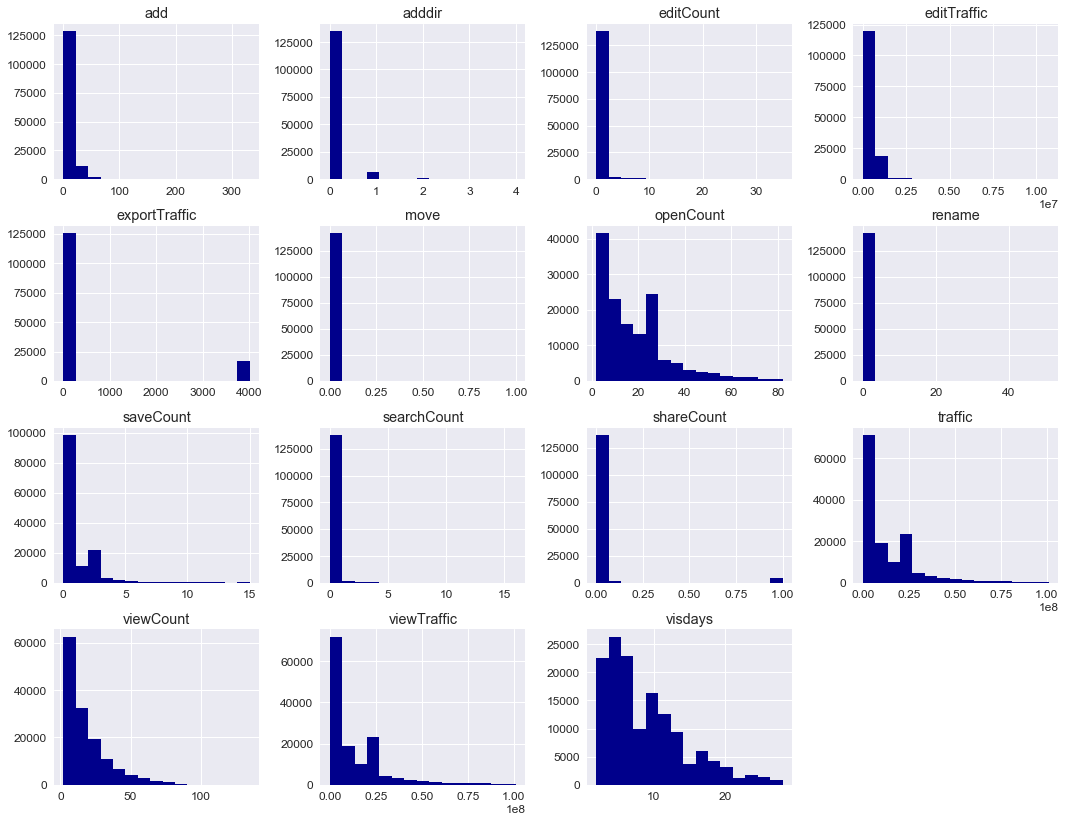

In [72]:
df4.hist(bins=15, color='darkblue', figsize=(18,14)); # right skewed

In [73]:
# log 함수 적용
df4_log = df4.apply(lambda x: np.log(x+1))    

df4_log.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,
10100018739106,2.5649,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.9459,2.5649,0.0000,15.0696,0.0000,0.0,15.0696
10100037810674,3.1781,0.0,0.0000,0.6931,2.6391,0.0,0.0,0.0,2.1972,3.1781,0.0000,16.6559,0.0000,0.0,16.6559
10100036273719,1.6094,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.6094,1.6094,0.0000,14.6195,0.0000,0.0,14.6195
10100027752244,1.9459,0.0,0.6931,0.0000,0.0000,0.0,0.0,0.0,1.7918,1.9459,1.0986,13.3086,12.2554,0.0,13.6078
10100006151000,3.5264,0.0,0.0000,0.0000,2.8332,0.0,0.0,0.0,2.9444,3.5264,0.0000,15.2759,0.0000,0.0,15.2759


In [74]:
df4_log.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000
mean,2.5922,0.1105,0.0219,0.0742,1.0066,0.0019,0.0042,0.0396,2.1263,2.6482,0.3863,15.2548,3.9816,0.9739,15.3200
std,0.8498,0.3872,0.1195,0.3259,1.4254,0.0363,0.0755,0.1744,0.5630,0.8220,0.6325,2.1986,5.8555,2.6705,2.0474
min,1.0986,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0986,1.0986,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.9459,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.6094,1.9459,0.0000,14.1221,0.0000,0.0000,14.1661
50%,2.5649,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0794,2.7081,0.0000,15.6980,0.0000,0.0000,15.7216
75%,3.2581,0.0000,0.0000,0.0000,2.5649,0.0000,0.0000,0.0000,2.5649,3.2527,0.6931,17.0699,10.6133,0.0000,17.0835
max,4.9127,3.5835,0.6931,2.8332,5.8081,0.6931,3.9512,1.6094,3.3673,4.4188,2.7726,18.4334,16.1878,8.2964,18.4334


In [75]:
df4.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,1.4234e+05,1.4234e+05,142344.0000,1.4234e+05
mean,17.9480,0.2909,0.0313,0.1948,7.1764,0.0028,0.0104,0.0617,8.7920,18.2650,0.9104,1.3855e+07,2.3822e+05,470.5459,1.4094e+07
std,16.6593,1.5301,0.1723,1.1348,14.3433,0.0524,0.3183,0.2874,5.5467,15.1046,1.8963,1.7322e+07,8.5638e+05,1290.2790,1.7493e+07
min,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,0.0000,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,6.0000,0.0000,1.3588e+06,0.0000e+00,0.0000,1.4200e+06
50%,12.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000,14.0000,0.0000,6.5697e+06,0.0000e+00,0.0000,6.7268e+06
75%,25.0000,0.0000,0.0000,0.0000,12.0000,0.0000,0.0000,0.0000,12.0000,24.8606,1.0000,2.5905e+07,4.0673e+04,0.0000,2.6259e+07
max,135.0000,35.0000,1.0000,16.0000,332.0000,1.0000,51.0000,4.0000,28.0000,82.0000,15.0000,1.0128e+08,1.0722e+07,4008.5815,1.0128e+08


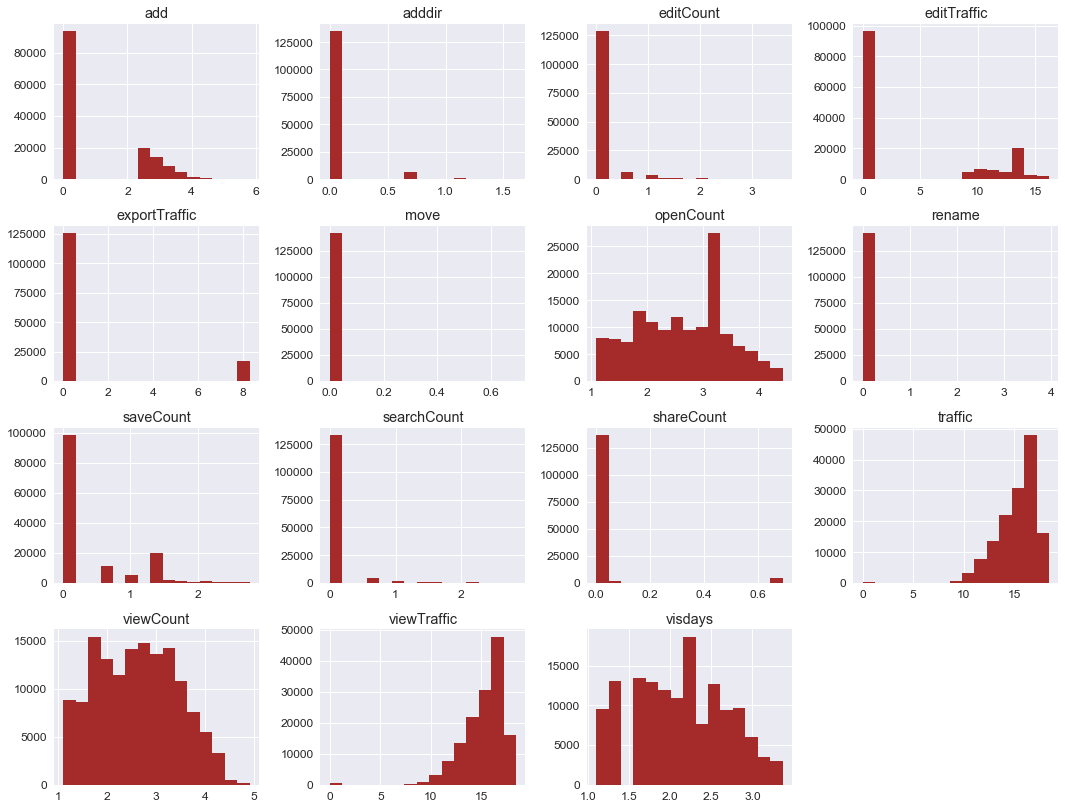

In [76]:
df4_log.hist(bins=15, color='brown', figsize=(18,14));

#### Scaling
- Standard Scaler (Mean: 0, std: 1)
- MinMax Scaler (default: min=0, max=1)

In [77]:
df4_std = df4.copy()

In [78]:
df4_std.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,6.0236e+05,210114.0,0.0,8.1248e+05
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06


In [79]:
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

for c in df4_std:
    df4_std[c] = StandardScaler().fit_transform(df4_std[c].reshape(-1,1)).round(4)

In [80]:
df4_std.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,1.4234e+05,1.4234e+05,1.4234e+05,1.4234e+05,1.4234e+05,1.4234e+05,1.4234e+05,1.4234e+05,1.4234e+05,1.4234e+05,1.4234e+05,1.4234e+05,1.4234e+05,1.4234e+05,1.4234e+05
mean,-2.3893e-06,-1.1964e-06,1.4045e-05,-1.8333e-05,2.6244e-05,4.9767e-05,-4.2785e-05,4.1884e-05,4.1238e-06,5.2851e-06,1.0170e-05,2.5438e-06,-1.4556e-05,-9.3829e-06,4.8228e-06
std,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00,9.9999e-01,1.0000e+00,1.0000e+00,9.9999e-01,1.0000e+00,1.0000e+00,9.9999e-01,1.0000e+00,1.0000e+00,1.0000e+00,1.0000e+00
min,-9.5730e-01,-1.9010e-01,-1.8180e-01,-1.7170e-01,-5.0030e-01,-5.2500e-02,-3.2800e-02,-2.1450e-01,-1.2245e+00,-1.0768e+00,-4.8010e-01,-7.9990e-01,-2.7820e-01,-3.6470e-01,-8.0570e-01
25%,-7.1720e-01,-1.9010e-01,-1.8180e-01,-1.7170e-01,-5.0030e-01,-5.2500e-02,-3.2800e-02,-2.1450e-01,-8.6390e-01,-8.1200e-01,-4.8010e-01,-7.2142e-01,-2.7820e-01,-3.6470e-01,-7.2450e-01
50%,-3.5700e-01,-1.9010e-01,-1.8180e-01,-1.7170e-01,-5.0030e-01,-5.2500e-02,-3.2800e-02,-2.1450e-01,-3.2310e-01,-2.8240e-01,-4.8010e-01,-4.2060e-01,-2.7820e-01,-3.6470e-01,-4.2115e-01
75%,4.2330e-01,-1.9010e-01,-1.8180e-01,-1.7170e-01,3.3630e-01,-5.2500e-02,-3.2800e-02,-2.1450e-01,5.7840e-01,4.3670e-01,4.7200e-02,6.9560e-01,-2.3070e-01,-3.6470e-01,6.9540e-01
max,7.0262e+00,2.2685e+01,5.6212e+00,1.3928e+01,2.2646e+01,1.9029e+01,1.6021e+02,1.3705e+01,3.4630e+00,4.2196e+00,7.4301e+00,5.0474e+00,1.2242e+01,2.7421e+00,4.9842e+00


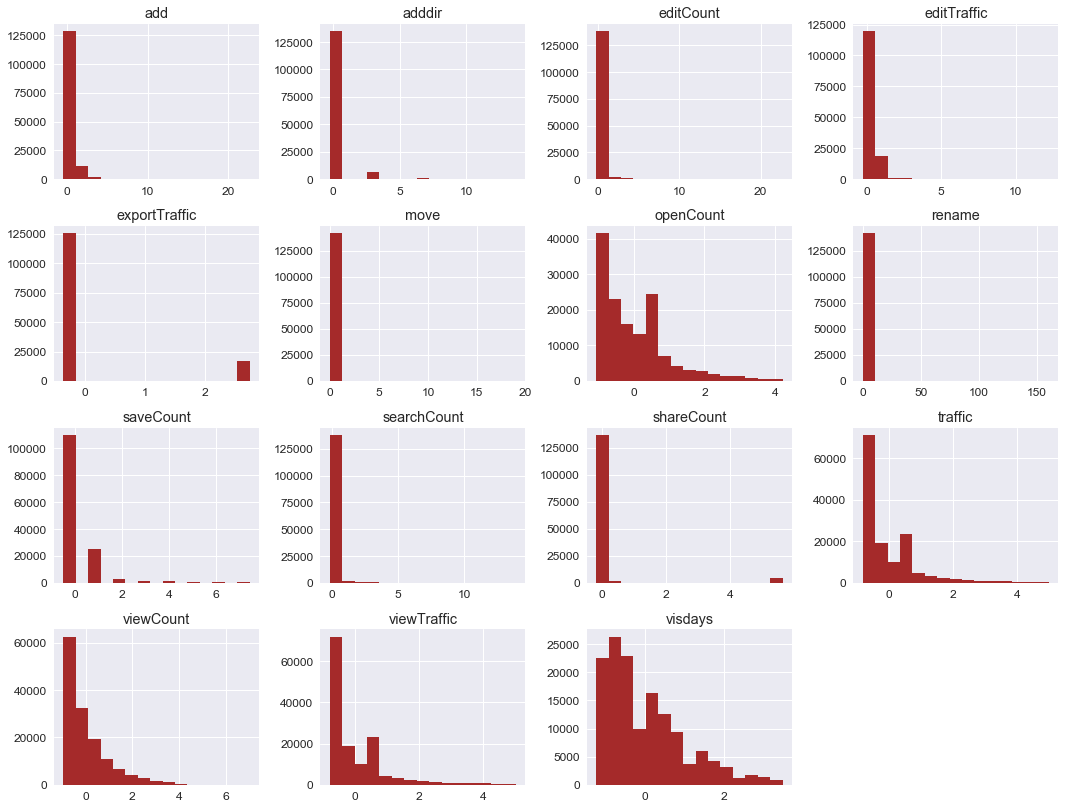

In [81]:
df4_std.hist(bins=15, color='brown', figsize=(18,14));

In [82]:
df4_minmax = df4.copy()

In [83]:
from sklearn.preprocessing import MinMaxScaler

for c in df4_minmax:
    df4_minmax[c] = MinMaxScaler().fit_transform(df4_minmax[c].reshape(-1,1).round(4))

In [84]:
df4_minmax.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000
mean,0.1199,0.0083,0.0313,0.0122,0.0216,0.0028,0.0002,0.0154,0.2612,0.2033,0.0607,0.1368,0.0222,0.1174,0.1392
std,0.1253,0.0437,0.1723,0.0709,0.0432,0.0524,0.0062,0.0718,0.2133,0.1888,0.1264,0.1710,0.0799,0.3219,0.1727
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.0301,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0769,0.0500,0.0000,0.0134,0.0000,0.0000,0.0140
50%,0.0752,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1923,0.1500,0.0000,0.0649,0.0000,0.0000,0.0664
75%,0.1729,0.0000,0.0000,0.0000,0.0361,0.0000,0.0000,0.0000,0.3846,0.2858,0.0667,0.2558,0.0038,0.0000,0.2593
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


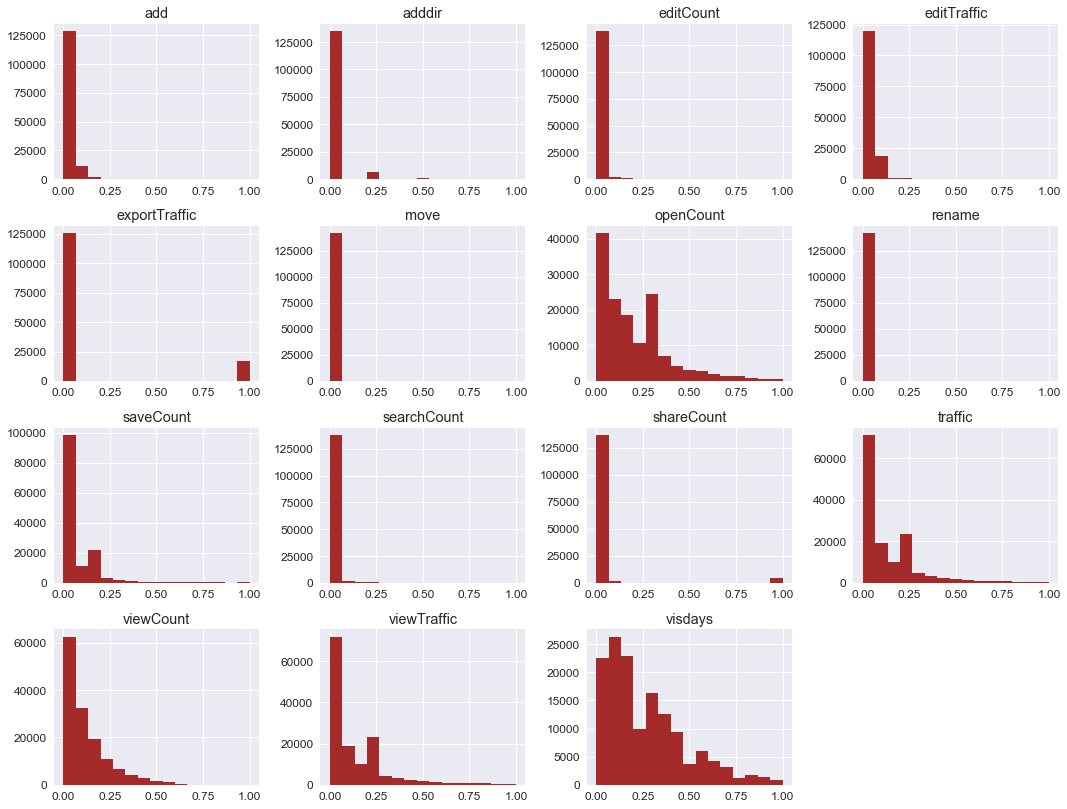

In [85]:
df4_minmax.hist(bins=15, color='brown', figsize=(18,14));

### Model 구축
 - **Logistic Regression**
     - Logistic regression fits a logistic model to data and makes predictions about the probability of an event (between 0 and 
 - **Naive Bayes**
    - Naive Bayes uses Bayes Theorem to model the conditional relationship of each attribute to the class variable
 - **k-Nearest Neighbor**
    - The k-Nearest Neighbor (kNN) method makes predictions by locating similar cases to a given data instance (using a similarity function) and returning the average or majority of the most similar data instances. The kNN algorithm can be used for classification or regression.
 - **Trees-based model**
    - Classification and Regression Trees (CART) are constructed from a dataset by making splits that best separate the data for the classes or predictions being made. The CART algorithm can be used for classification or regression
 - **Random Forest**
    - Random Forest is a machine learning algorithm used for classification, regression, and feature selection. It's an ensemble technique, meaning it combines the output of one weaker technique in order to get a stronger result. The weaker technique in this case is a decision tree. Decision trees work by splitting the and re-splitting the data by features. If a decision tree is split along good features, it can give a decent predictive output    
 - **SVM (Support Vector Machines)**
    - Support Vector Machines (SVM) are a method that uses points in a transformed problem space that best separate classes into two groups. Classification for multiple classes is supported by a one-vs-all method. SVM also supports regression by modeling the function with a minimum amount of allowable error

In [86]:
# df4 = no missing values, & no transform/scaling yet

df4.describe() 

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
count,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,1.4234e+05,1.4234e+05,142344.0000,1.4234e+05
mean,17.9480,0.2909,0.0313,0.1948,7.1764,0.0028,0.0104,0.0617,8.7920,18.2650,0.9104,1.3855e+07,2.3822e+05,470.5459,1.4094e+07
std,16.6593,1.5301,0.1723,1.1348,14.3433,0.0524,0.3183,0.2874,5.5467,15.1046,1.8963,1.7322e+07,8.5638e+05,1290.2790,1.7493e+07
min,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,0.0000,0.0000e+00,0.0000e+00,0.0000,0.0000e+00
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,6.0000,0.0000,1.3588e+06,0.0000e+00,0.0000,1.4200e+06
50%,12.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000,14.0000,0.0000,6.5697e+06,0.0000e+00,0.0000,6.7268e+06
75%,25.0000,0.0000,0.0000,0.0000,12.0000,0.0000,0.0000,0.0000,12.0000,24.8606,1.0000,2.5905e+07,4.0673e+04,0.0000,2.6259e+07
max,135.0000,35.0000,1.0000,16.0000,332.0000,1.0000,51.0000,4.0000,28.0000,82.0000,15.0000,1.0128e+08,1.0722e+07,4008.5815,1.0128e+08


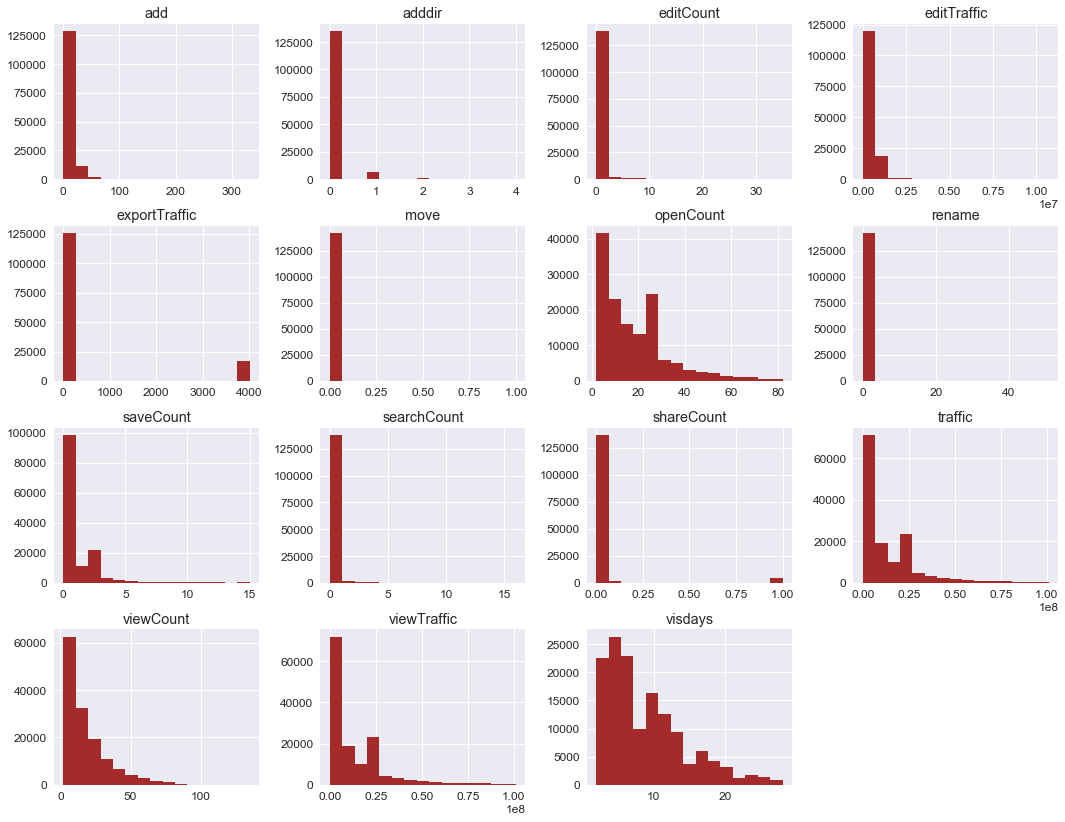

In [87]:
df4.hist(bins=15, color='brown', figsize=(18,14));

In [88]:
df4.corr()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
viewCount,1.0000,0.1136,0.0753,-0.0097,0.5525,0.0560,0.0338,0.1924,0.6570,0.8943,0.2022,0.4276,0.1081,0.0710,0.4287
editCount,0.1136,1.0000,0.0611,0.1162,0.1280,0.0845,0.0653,0.1049,0.1646,0.0848,0.4574,-0.0243,0.0869,0.0451,-0.0198
shareCount,0.0753,0.0611,1.0000,0.0397,0.0300,0.0383,0.0126,0.0489,0.0449,0.0707,0.0984,0.0191,0.0338,-0.0149,0.0205
searchCount,-0.0097,0.1162,0.0397,1.0000,-0.0185,0.0169,0.0096,0.0082,0.1667,-0.0263,0.1654,-0.0168,0.0653,-0.0239,-0.0135
add,0.5525,0.1280,0.0300,-0.0185,1.0000,0.0582,0.0443,0.2257,0.4619,0.4979,0.1428,0.2602,0.0837,0.1087,0.2617
move,0.0560,0.0845,0.0383,0.0169,0.0582,1.0000,0.0813,0.1403,0.0382,0.0531,0.0749,0.0163,0.0253,0.0046,0.0174
rename,0.0338,0.0653,0.0126,0.0096,0.0443,0.0813,1.0000,0.0805,0.0341,0.0256,0.0441,0.0120,0.0227,0.0140,0.0130
adddir,0.1924,0.1049,0.0489,0.0082,0.2257,0.1403,0.0805,1.0000,0.1165,0.1903,0.1405,0.0764,0.0681,0.0015,0.0790
visdays,0.6570,0.1646,0.0449,0.1667,0.4619,0.0382,0.0341,0.1165,1.0000,0.5989,0.1512,0.2736,0.0728,0.0176,0.2744
openCount,0.8943,0.0848,0.0707,-0.0263,0.4979,0.0531,0.0256,0.1903,0.5989,1.0000,0.2497,0.4933,0.1353,0.1592,0.4951


#### [다중공선성](https://ko.wikipedia.org/wiki/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1) 
- viewTraffic & traffic
- openCount & viewCount

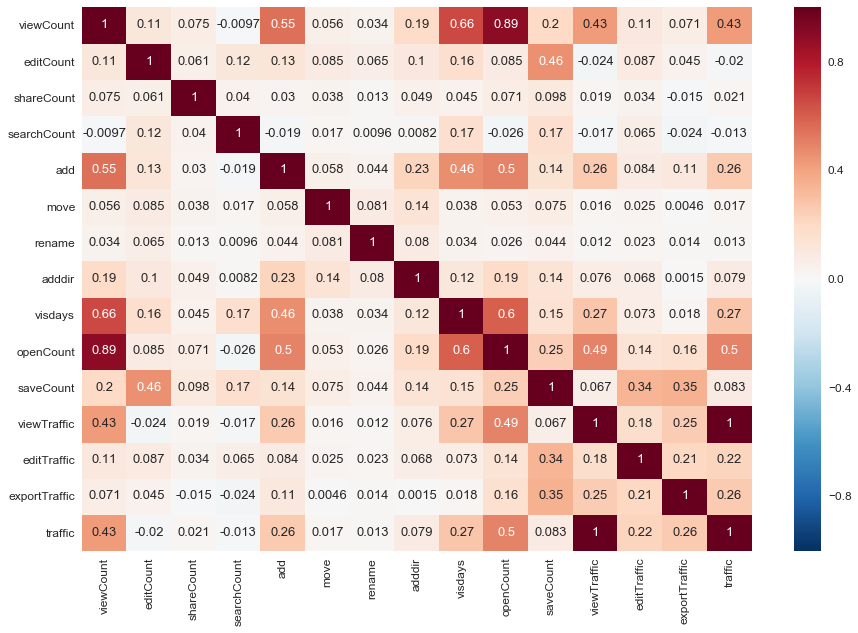

In [89]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(df4.corr(), annot=True, annot_kws={"size": 13});

In [90]:
df4 = df4.join(df2['group'])

In [91]:
df4.group.value_counts()

sdu    138596
mdu      3748
Name: group, dtype: int64

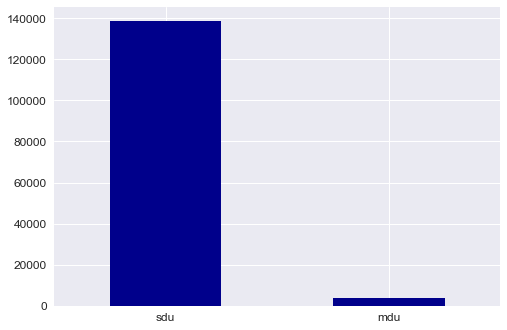

In [92]:
df4.group.value_counts().plot(kind='bar', color='darkblue', rot=0)

#### Imbalance 이슈 !!
- mdu 에 대한 학습을 위한 데이터 사례가 불충분
- 모델이 sdu 로 대부분 예측하는 결과
- https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/

In [93]:
# convert string to int
df4['group'] = np.where(df4['group'] == 'sdu', 0, 1) 

In [94]:
df4.group.value_counts()

0    138596
1      3748
Name: group, dtype: int64

### Dataset 분리
- 모델 구축 후 성능 검증을 위해 전체 Dataset을 Train과 Test로 나눈다. 
- Testset은 최적화된 파라메터로 구축된 최종 모델의 성능을 파악하기 위해 단 1회만 사용한다. 
- 최적화 파라메타는 Scikit-learn에서 제공하는 grid_serach를 이용한다.
- Dataset을 나눌 때 test_size 옵션으로 Train, Test의 비율을 설정할 수 있고, random_state로 seed 값을 지정할 수 있다.

- 데이터 샘플이 너무 많다면, 연상 비용이 크게 증가할 수 있어 샘플링이 필요하다.

```python
# 샘플링 예시 코드 / frac에는 샘플링셋의 비율을 입력, Replace는 비복원으로 지정(False)
df_sampled = df.sample(frac=.1, replace=False) 
```


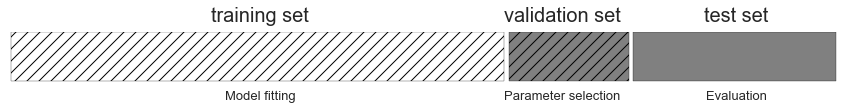

In [95]:
import mglearn

mglearn.plots.plot_threefold_split()

In [96]:
from sklearn.cross_validation import train_test_split

# set ind vars and target var
X = df4.drop('group', axis=1)
y = df4.group

# train + val, test
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, random_state=23)

# split train, val, test
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, random_state=11)

In [97]:
print(X.shape)
print(y.shape)

(142344, 15)
(142344,)


In [98]:
print(X_train.shape)
print(y_train.shape)

(80068, 15)
(80068,)


In [99]:
print(X_val.shape)
print(y_val.shape)

(26690, 15)
(26690,)


In [100]:
print(X_test.shape)
print(y_test.shape)

(35586, 15)
(35586,)


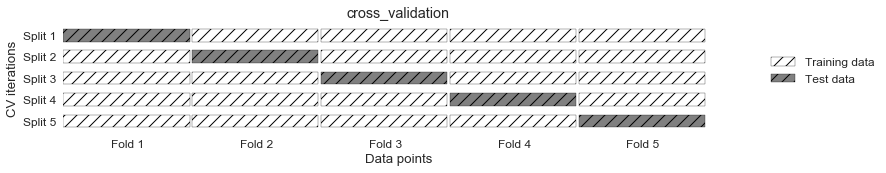

In [101]:
# K-fold CV
mglearn.plots.plot_cross_validation()

### 모델 파라메터 설정
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- 주요 파라메터 (C)
    - C 값 (기본값 = 1)
    - C 값이 작으면 Penalty 강해짐 (단순 모델)
    - C 값이 크면 Penalty 약해짐 (정규화 없어짐)
    - 보통 로그스케일로 지정(10배씩) = 0.01, 0.1, 1, 10
- penalty
    - L2: Ridge, 일반적으로 사용 (default)
    - L1: LASSO, 변수가 많아서 줄여야할 때 사용, 모델의 단순화 및 해석에 용이

In [102]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# SET default
best_score = 0

# iterataion
for r in ['l1', 'l2']:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        lm = LogisticRegression(penalty = r, C=C)
        scores = cross_val_score(lm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'penalty': r}

In [103]:
print(best_score) 
print(best_parameters) # 최적 매개변수

0.9735570173168873
{'penalty': 'l2', 'C': 0.001}


In [104]:
lm = LogisticRegression(**best_parameters)

In [105]:
lm.fit(X_trainval, y_trainval)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [106]:
test_score = lm.score(X_test, y_test)
print(test_score)

0.9740066318215028


In [107]:
# more simply
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}
param_grid

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

In [108]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring = 'roc_auc', cv=5)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23)

In [110]:
y.value_counts()

0    138596
1      3748
Name: group, dtype: int64

In [111]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [112]:
grid_search.score(X_test, y_test)

0.8981424406432341

In [113]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'penalty': 'l1', 'C': 0.1}
0.8988559027455983


In [114]:
print(grid_search.best_estimator_)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [115]:
grid_search.score(X_test, y_test)

0.8981424406432341

### 모델 평가

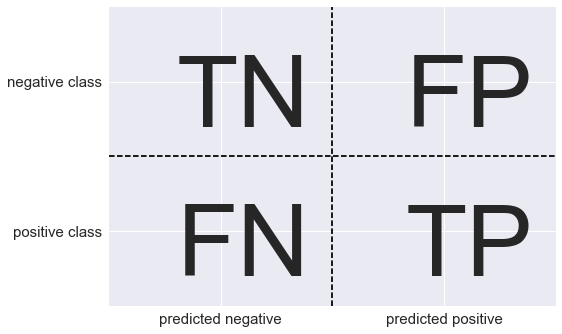

In [116]:
import mglearn

mglearn.plots.plot_binary_confusion_matrix()

In [117]:
print(grid_search.predict(X_test))
print(len(X_test))

[0 0 0 ... 0 0 0]
35586


In [118]:
print(np.array(y_test[:10]))
print(len(y_test))

[0 0 0 0 0 0 0 0 0 0]
35586


In [119]:
pd.Series(grid_search.predict(X_test)).value_counts()

0    35199
1      387
dtype: int64

In [120]:
y_test.value_counts()

0    34661
1      925
Name: group, dtype: int64

In [121]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(grid_search.predict(X_test), y_test))

[[34467   732]
 [  194   193]]


In [122]:
from sklearn.metrics import classification_report

print(classification_report(grid_search.predict(X_test), y_test))

             precision    recall  f1-score   support

          0       0.99      0.98      0.99     35199
          1       0.21      0.50      0.29       387

avg / total       0.99      0.97      0.98     35586



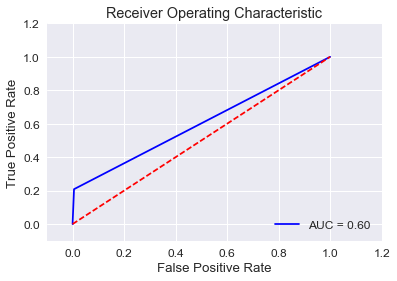

In [123]:
# ROC plot
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Upsampling & Downsampling for imbalanced data
1. Collect More Data (if possible)
2. Resampling the Dataset
    - oversampling
        - no inofromation loss, perform better than undersampling
        - overfitting issues (because of duplicates)
    - undersampling
        - help improve run time and storage problems
        - information loss, biased dataset
3. Generate Synthetic Samples

In [124]:
df4.group.value_counts()

0    138596
1      3748
Name: group, dtype: int64

In [125]:
#df4.group.value_counts().transform(lambda x: x / x.sum())

In [126]:
df4.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic,group
iduser,,,,,,,,,,,,,,,,
10100018739106,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,12.0,0.0,3.5048e+06,0.0,0.0,3.5048e+06,0
10100037810674,23.0,0.0,0.0,1.0,13.0,0.0,0.0,0.0,8.0,23.0,0.0,1.7123e+07,0.0,0.0,1.7123e+07,0
10100036273719,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,2.2344e+06,0.0,0.0,2.2344e+06,0
10100027752244,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,6.0,2.0,6.0236e+05,210114.0,0.0,8.1248e+05,0
10100006151000,33.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,18.0,33.0,0.0,4.3077e+06,0.0,0.0,4.3077e+06,0


In [127]:
pay_df = df4.query("group == 1")

df_over = pd.concat([pay_df, pay_df, pay_df], axis=0) # upsampling 3 times

In [128]:
len(df_over)

11244

In [129]:
df4_over = pd.concat([df4, df_over], axis=0)

In [130]:
df4_over.group.value_counts()

0    138596
1     14992
Name: group, dtype: int64

In [131]:
X = df4_over.drop("group", axis=1)
y = df4_over.group

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

In [132]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(X_test.shape)

(115191, 15)
(115191,)
(38397, 15)
(38397, 15)


In [133]:
y_train.value_counts()

0    103892
1     11299
Name: group, dtype: int64

In [134]:
y_test.value_counts()

0    34704
1     3693
Name: group, dtype: int64

In [135]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}

grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring = 'roc_auc', cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [136]:
print(grid_search.best_estimator_)
print(grid_search.best_score_)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.9066878883673856


In [137]:
grid_search.score(X_test, y_test) # accuracy

0.903414901742384

In [138]:
print(confusion_matrix(grid_search.predict(X_test), y_test))
print(classification_report(grid_search.predict(X_test), y_test))

[[34108  1835]
 [  596  1858]]
             precision    recall  f1-score   support

          0       0.98      0.95      0.97     35943
          1       0.50      0.76      0.60      2454

avg / total       0.95      0.94      0.94     38397



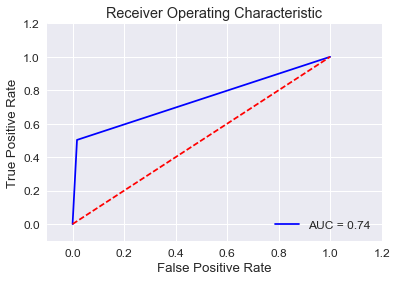

In [139]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(false_positive_rate, true_positive_rate)

fig = plt.figure(figsize=(6,4))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### The model performance of the first application
- Baseline: recall: .76 / AUC: 0.74
- How to improve
    - There seems no overfitting issues
    - Model, Parameters
        - KNN, NB, SVM, RF, NN .. any classification models
    - Feature Engineering
        - Scaling, Transformation
        - Feature selection
        - Numeric to Categorical
        - Polynomial / Interactions

In [140]:
X_train.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic
iduser,,,,,,,,,,,,,,,
10100032972841,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0000,0.0000,9.1219e+05,0.0000e+00,0.0000,9.1219e+05
10100026761160,27.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,14.0,24.8606,2.7537,2.5958e+07,7.3223e+05,4008.5815,2.6694e+07
10100039479147,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,2.0000,0.0000,1.8347e+05,0.0000e+00,0.0000,1.8347e+05
10100007892169,28.0,34.0,0.0,1.0,36.0,1.0,0.0,1.0,12.0,28.0000,12.0000,7.1398e+05,5.0233e+05,0.0000,1.2163e+06
10100038383945,27.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,11.0,27.0000,1.0000,4.7218e+07,3.3055e+06,0.0000,5.0524e+07


In [141]:
len(X_train.columns)

15

In [142]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() #default: 0~1

In [143]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [144]:
X_train_scaled

array([[0.015, 0.   , 0.   , ..., 0.   , 0.   , 0.009],
       [0.188, 0.   , 0.   , ..., 0.068, 1.   , 0.264],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.002],
       ...,
       [0.135, 0.   , 0.   , ..., 0.068, 1.   , 0.264],
       [0.038, 0.   , 0.   , ..., 0.068, 1.   , 0.264],
       [0.008, 0.   , 0.   , ..., 0.022, 0.   , 0.017]])

In [145]:
X_test_scaled

array([[0.113, 0.   , 0.   , ..., 0.068, 1.   , 0.264],
       [0.008, 0.   , 0.   , ..., 0.   , 0.   , 0.007],
       [0.195, 0.   , 0.   , ..., 0.   , 0.   , 0.022],
       ...,
       [0.105, 0.   , 0.   , ..., 0.068, 1.   , 0.264],
       [0.188, 0.   , 0.   , ..., 0.   , 0.   , 0.762],
       [0.15 , 0.029, 0.   , ..., 0.701, 0.   , 0.54 ]])

In [146]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [147]:
print(grid_search.best_estimator_)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [148]:
print(grid_search.best_params_)

{'penalty': 'l1', 'C': 0.1}


In [149]:
print(classification_report(grid_search.predict(X_test_scaled), y_test))

             precision    recall  f1-score   support

          0       0.98      0.95      0.97     35970
          1       0.50      0.76      0.60      2427

avg / total       0.95      0.94      0.94     38397



In [150]:
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test_scaled))
roc_auc = auc(fpr, tpr)

In [151]:
print(roc_auc)

0.7402133217904308


In [152]:
from sklearn.preprocessing import StandardScaler

# scaler object
scaler = StandardScaler()

# transform
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# best params
grid_search.fit(X_train_scaled, y_train)

# evaluation
print(classification_report(grid_search.predict(X_test_scaled), y_test))

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test_scaled))
roc_auc = auc(fpr, tpr)
print(roc_auc)

             precision    recall  f1-score   support

          0       0.98      0.95      0.96     36087
          1       0.47      0.75      0.58      2310

avg / total       0.95      0.93      0.94     38397

0.7269191222487762


#### Distribution Transformation

In [153]:
df4.describe()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic,group
count,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,142344.0000,1.4234e+05,1.4234e+05,142344.0000,1.4234e+05,142344.0000
mean,17.9480,0.2909,0.0313,0.1948,7.1764,0.0028,0.0104,0.0617,8.7920,18.2650,0.9104,1.3855e+07,2.3822e+05,470.5459,1.4094e+07,0.0263
std,16.6593,1.5301,0.1723,1.1348,14.3433,0.0524,0.3183,0.2874,5.5467,15.1046,1.8963,1.7322e+07,8.5638e+05,1290.2790,1.7493e+07,0.1601
min,2.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,2.0000,2.0000,0.0000,0.0000e+00,0.0000e+00,0.0000,0.0000e+00,0.0000
25%,6.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,6.0000,0.0000,1.3588e+06,0.0000e+00,0.0000,1.4200e+06,0.0000
50%,12.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,7.0000,14.0000,0.0000,6.5697e+06,0.0000e+00,0.0000,6.7268e+06,0.0000
75%,25.0000,0.0000,0.0000,0.0000,12.0000,0.0000,0.0000,0.0000,12.0000,24.8606,1.0000,2.5905e+07,4.0673e+04,0.0000,2.6259e+07,0.0000
max,135.0000,35.0000,1.0000,16.0000,332.0000,1.0000,51.0000,4.0000,28.0000,82.0000,15.0000,1.0128e+08,1.0722e+07,4008.5815,1.0128e+08,1.0000


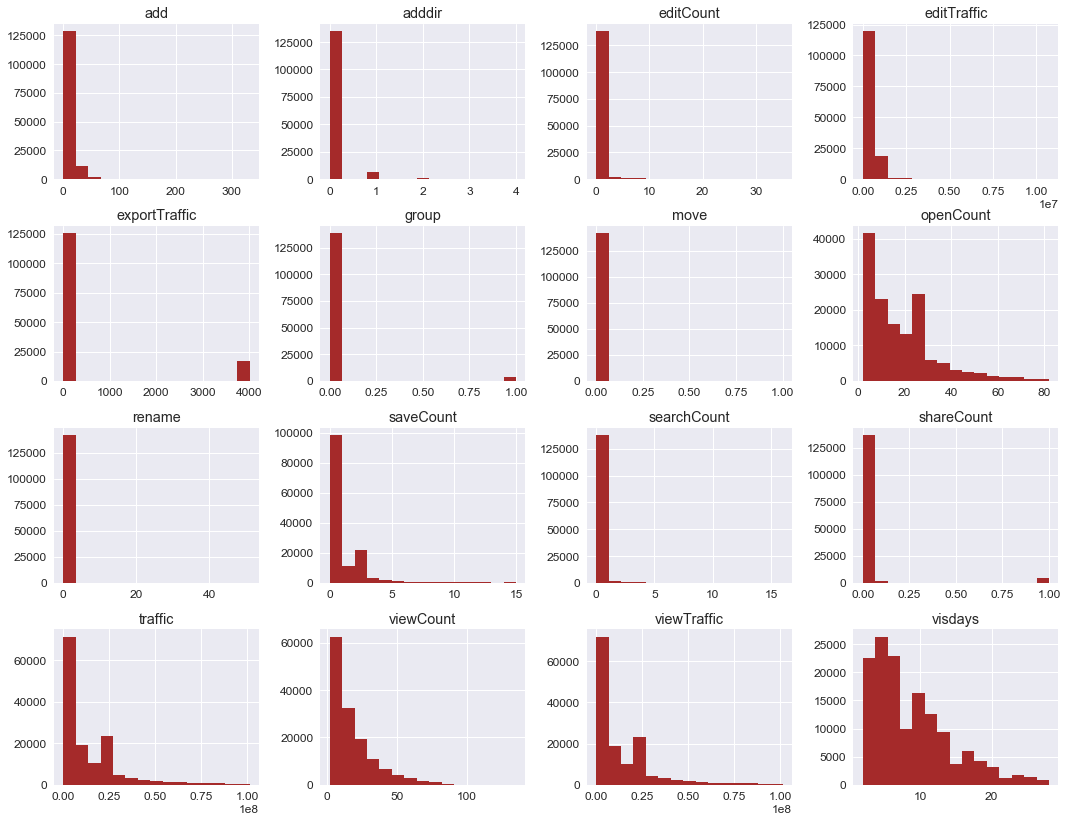

In [154]:
df4.hist(bins=15, color='brown', figsize=(18,14));

In [155]:
df4_log = df4.drop("group", axis=1).apply(lambda x: np.log(x+1))

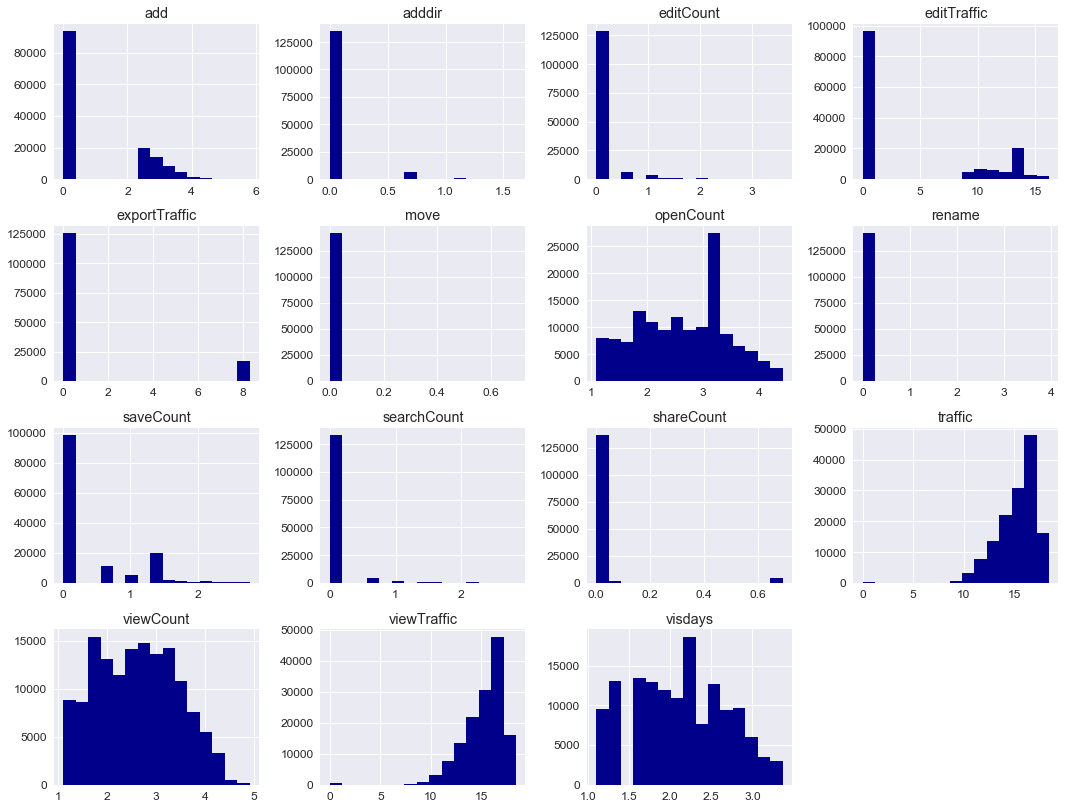

In [156]:
df4_log.hist(bins=15, color='darkblue', figsize=(18,14));

In [157]:
# concat group
df4_log = df4_log.join(df4.group)

# oversampling
pay_df = df4_log.query("group == 1")
df_over = pd.concat([pay_df, pay_df, pay_df], axis=0)
df4_over = pd.concat([df4_log, df_over], axis=0)

In [158]:
df4_over.head()

,viewCount,editCount,shareCount,searchCount,add,move,rename,adddir,visdays,openCount,saveCount,viewTraffic,editTraffic,exportTraffic,traffic,group
iduser,,,,,,,,,,,,,,,,
10100018739106,2.5649,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.9459,2.5649,0.0000,15.0696,0.0000,0.0,15.0696,0
10100037810674,3.1781,0.0,0.0000,0.6931,2.6391,0.0,0.0,0.0,2.1972,3.1781,0.0000,16.6559,0.0000,0.0,16.6559,0
10100036273719,1.6094,0.0,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.6094,1.6094,0.0000,14.6195,0.0000,0.0,14.6195,0
10100027752244,1.9459,0.0,0.6931,0.0000,0.0000,0.0,0.0,0.0,1.7918,1.9459,1.0986,13.3086,12.2554,0.0,13.6078,0
10100006151000,3.5264,0.0,0.0000,0.0000,2.8332,0.0,0.0,0.0,2.9444,3.5264,0.0000,15.2759,0.0000,0.0,15.2759,0


In [159]:
df4_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153588 entries, 10100018739106 to 10100037382422
Data columns (total 16 columns):
viewCount        153588 non-null float64
editCount        153588 non-null float64
shareCount       153588 non-null float64
searchCount      153588 non-null float64
add              153588 non-null float64
move             153588 non-null float64
rename           153588 non-null float64
adddir           153588 non-null float64
visdays          153588 non-null float64
openCount        153588 non-null float64
saveCount        153588 non-null float64
viewTraffic      153588 non-null float64
editTraffic      153588 non-null float64
exportTraffic    153588 non-null float64
traffic          153588 non-null float64
group            153588 non-null int64
dtypes: float64(15), int64(1)
memory usage: 19.9 MB


In [160]:
### set X, y
X = df4_over.drop('group', axis=1)
y = df4_over.group

# split the datset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# best params
grid_search.fit(X_train, y_train)

# evaluation
print(classification_report(grid_search.predict(X_test), y_test))

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(fpr, tpr)
print(roc_auc)

             precision    recall  f1-score   support

          0       0.98      0.95      0.97     35912
          1       0.51      0.78      0.61      2485

avg / total       0.95      0.94      0.94     38397

0.7447594357761692


#### [Feature Selection](https://machinelearningmastery.com/feature-selection-machine-learning-python/)
 - Multicollinearity
 - Univariate Selection: T-test, ANOVA, Coefficient 
 - Feature Importance (Tree-based model)
 - RFE

In [161]:
len(X.columns)

15

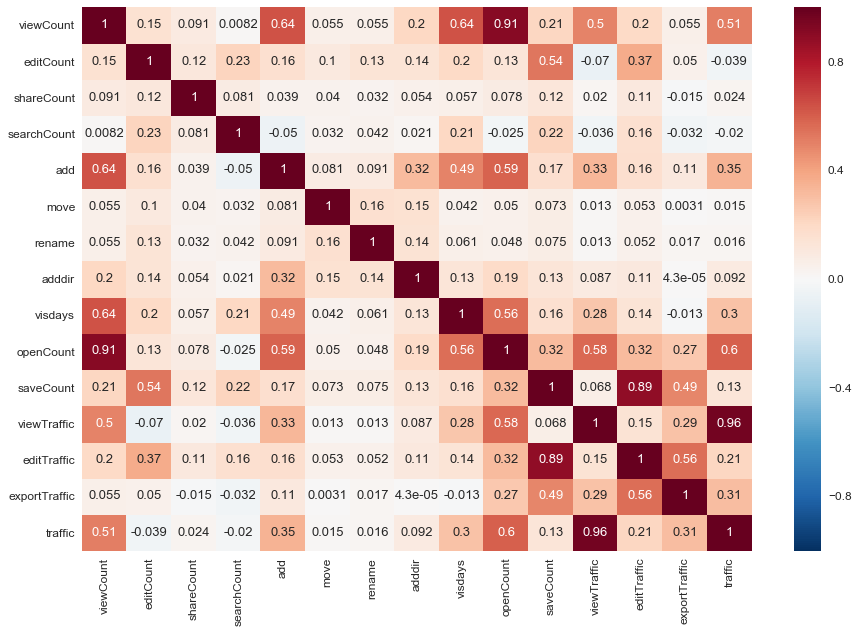

In [162]:
fig, ax = plt.subplots(figsize=(15,10))

sns.heatmap(X.corr(), annot=True, annot_kws={"size": 13});

#### [Multicollinearity](https://ko.wikipedia.org/wiki/%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1)
- traffic => viewTraffic
- saveCount => editTraffic
- openCount => viewCount

In [163]:
## cols to drop 
drop_cols = ['group', 'traffic', 'saveCount', 'openCount']

### set X, y
X = df4_over.drop(drop_cols, axis=1)
y = df4_over.group

# split the datset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# best params
grid_search.fit(X_train, y_train)

# evaluation
print(classification_report(grid_search.predict(X_test), y_test))

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(fpr, tpr)
print(roc_auc)

             precision    recall  f1-score   support

          0       0.98      0.95      0.97     35900
          1       0.51      0.78      0.62      2497

avg / total       0.95      0.94      0.94     38397

0.7464688177858027


In [164]:
len(X_train.columns)

12

#### Univariate Selection
- [F value](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection)
- 그룹내 분산이 작고, 그룹간 분산이 클 경우 F value가 커짐 (F value가 크다는 의미는 그룹간 통계적 차이가 크다는 것을 의미)

In [165]:
from sklearn.feature_selection import SelectKBest, f_classif

### set X, y
X = df4_over.drop(drop_cols, axis=1)
y = df4_over.group

selectK = SelectKBest(score_func=f_classif, k=8)
X = selectK.fit_transform(X, y)

# split the datset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# best params
grid_search.fit(X_train, y_train)

# evaluation
print(classification_report(grid_search.predict(X_test), y_test))

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(fpr, tpr)
print(roc_auc)

             precision    recall  f1-score   support

          0       0.99      0.93      0.96     36473
          1       0.38      0.75      0.50      1924

avg / total       0.96      0.93      0.94     38397

0.6808873941710631


#### Feature Importance of ExtraTreesClassifier

In [166]:
from sklearn.ensemble import ExtraTreesClassifier

### set X, y
X = df4_over.drop(drop_cols, axis=1)
y = df4_over.group

etc_model = ExtraTreesClassifier()

etc_model.fit(X, y)
print(etc_model.feature_importances_)

[0.166 0.036 0.006 0.201 0.052 0.001 0.004 0.008 0.247 0.196 0.063 0.018]


In [167]:
feature_list = pd.concat([pd.Series(X.columns), pd.Series(etc_model.feature_importances_)], axis=1)
feature_list.columns = ['features_name', 'importance']

feature_list.sort_values("importance", ascending =False)[:8]

,features_name,importance
8,visdays,0.2473
3,searchCount,0.2008
9,viewTraffic,0.1964
0,viewCount,0.1656
10,editTraffic,0.0628
4,add,0.0524
1,editCount,0.0361
11,exportTraffic,0.0180


In [168]:
mycols = feature_list.sort_values("importance", ascending =False)[:8]['features_name'].values

mycols

array(['visdays', 'searchCount', 'viewTraffic', 'viewCount',
       'editTraffic', 'add', 'editCount', 'exportTraffic'], dtype=object)

In [169]:
### set X, y
X = df4_over[mycols]
y = df4_over.group

# split the datset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# best params
grid_search.fit(X_train, y_train)

# evaluation
print(classification_report(grid_search.predict(X_test), y_test))

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(fpr, tpr)
print(roc_auc)

             precision    recall  f1-score   support

          0       0.98      0.94      0.96     36007
          1       0.48      0.77      0.60      2390

avg / total       0.95      0.93      0.94     38397

0.733677120277472


#### RFE (recursive feature elimination)
- Backward 방식중 하나로 모든 변수를 다 포함시키고 반복해서 학습을 하면서 중요하지 않은 변수를 하나씩 제거하는 방식
- [API DOC](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE)



In [170]:
from sklearn.feature_selection import RFE

### set X, y
X = df4_over.drop(drop_cols, axis=1)
y = df4_over.group

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 8)
fit = rfe.fit(X, y)

In [171]:
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

Num Features: 8
Selected Features: [ True  True  True  True False  True  True False  True False False  True]
Feature Ranking: [1 1 1 1 3 1 1 2 1 5 4 1]


In [172]:
feature_list_rfe = pd.concat([pd.Series(fit.ranking_), pd.Series(X.columns)], axis=1)
feature_list_rfe.columns = ['rank', 'features_name']

feature_list_rfe

,rank,features_name
0,1,viewCount
1,1,editCount
2,1,shareCount
3,1,searchCount
4,3,add
5,1,move
6,1,rename
7,2,adddir
8,1,visdays
9,5,viewTraffic


In [173]:
mycols_rfe = feature_list_rfe.query("rank == 1")['features_name'].values

mycols_rfe

array(['viewCount', 'editCount', 'shareCount', 'searchCount', 'move',
       'rename', 'visdays', 'exportTraffic'], dtype=object)

In [174]:
len(mycols_rfe)

8

In [175]:
### set X, y
X = df4_over[mycols_rfe]
y = df4_over.group

# split the datset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

# best params
grid_search.fit(X_train, y_train)

# evaluation
print(classification_report(grid_search.predict(X_test), y_test))

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(fpr, tpr)
print(roc_auc)

             precision    recall  f1-score   support

          0       0.98      0.94      0.96     36001
          1       0.48      0.77      0.59      2396

avg / total       0.95      0.93      0.94     38397

0.73272125063384


### Let's explore a better model

In [188]:
### set X, y
X = df4_over[mycols_rfe]
y = df4_over.group

# split the datset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [189]:
X.head()

,viewCount,editCount,shareCount,searchCount,move,rename,visdays,exportTraffic
iduser,,,,,,,,
10100018739106,2.5649,0.0,0.0000,0.0000,0.0,0.0,1.9459,0.0
10100037810674,3.1781,0.0,0.0000,0.6931,0.0,0.0,2.1972,0.0
10100036273719,1.6094,0.0,0.0000,0.0000,0.0,0.0,1.6094,0.0
10100027752244,1.9459,0.0,0.6931,0.0000,0.0,0.0,1.7918,0.0
10100006151000,3.5264,0.0,0.0000,0.0000,0.0,0.0,2.9444,0.0


In [190]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(115191, 8)
(115191,)
(38397, 8)
(38397,)


#### RandomForestClassifier

In [192]:
from sklearn.ensemble import RandomForestClassifier

params_grid = [{'max_depth': [2, 4, 6], # max_depth: The maximum depth of the tree.
               'n_estimators': [10, 50, 100], # n_estimators: The number of trees in the forest.
               'min_samples_split': [50, 100]
               }]

grid_search = GridSearchCV(RandomForestClassifier(), params_grid, scoring = 'roc_auc', cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [10, 50, 100], 'min_samples_split': [50, 100], 'max_depth': [2, 4, 6]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [198]:
#print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'min_samples_split': 50, 'n_estimators': 100, 'max_depth': 6}
0.9126444016599573


In [195]:
# evaluation
print(classification_report(grid_search.predict(X_test), y_test))

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(fpr, tpr)
print(roc_auc)

             precision    recall  f1-score   support

          0       0.99      0.94      0.96     36242
          1       0.45      0.80      0.57      2155

avg / total       0.96      0.93      0.94     38397

0.7170882182366825


#### KNN

In [208]:
from sklearn.neighbors import KNeighborsClassifier

params_grid = [{'n_neighbors': [3, 5, 10], # default: 5
                'metric': ['euclidean', 'manhattan'] # cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’
               }]

grid_search = GridSearchCV(KNeighborsClassifier(), params_grid, scoring = 'roc_auc', cv=3)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_neighbors': [3, 5, 10], 'metric': ['euclidean', 'manhattan']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [209]:
#print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

{'n_neighbors': 10, 'metric': 'manhattan'}
0.9196988664165748


In [210]:
# evaluation
print(classification_report(grid_search.predict(X_test), y_test))

fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))
roc_auc = auc(fpr, tpr)
print(roc_auc)

             precision    recall  f1-score   support

          0       0.98      0.96      0.97     35236
          1       0.63      0.76      0.69      3161

avg / total       0.95      0.94      0.95     38397

0.8043605931769576


#### SVC

In [204]:
# from sklearn.svm import SVC

# params_grid = [{'C': [1, 10], # Penalty parameter C of the error term
#                 'gamma': [1, 10] # Higher the value of gamma, will try to exact fit
# #                'kernel': ['linear', 'rbf']
#                }]

# grid_search = GridSearchCV(SVC(), params_grid, scoring = 'roc_auc', cv=3)

# grid_search.fit(X_train, y_train)

In [ ]:
# print(grid_search.best_estimator_)
# print(grid_search.best_params_)
# print(grid_search.best_score_)

# # evaluation
# print(classification_report(grid_search.predict(X_test), y_test))

# fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))
# roc_auc = auc(fpr, tpr)
# print(roc_auc)

#### ANN (MLP)

In [ ]:
# from sklearn.neural_network import MLPClassifier

# params_grid = [{'solver': [1, 10],
#                 'hidden_layer_sizes': [(5,2), (3,3)]
#                }]

# grid_search = GridSearchCV(MLPClassifier(), params_grid, scoring = 'roc_auc', cv=3)

# grid_search.fit(X_train, y_train)

In [ ]:
#print(grid_search.best_estimator_)
# print(grid_search.best_params_)
# print(grid_search.best_score_)

In [ ]:
# evaluation
# print(classification_report(grid_search.predict(X_test), y_test))

# fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict(X_test))
# roc_auc = auc(fpr, tpr)
# print(roc_auc)